In [141]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Wczytanie danych

### Bio

In [4]:
# wczytaj bio graczy do zmiennej bio - wykorzystaj funkcję pandas do wczytywania jsonów

### Staty

In [ ]:
# wczytaj plik csv ze statami zawodników do zmiennej stats

# Obrabianie danych

Część pól bio trzeba dodatkowo przeparsować

In [33]:
bio['weight'] =  pd.to_numeric(bio['psysicall'].str['weight'].str[:-2])
bio['born_year'] = pd.to_numeric(bio['Born'].str.split(', ').str[-1].str[:4])

In [3]:
# Dokończ parsowanie. Stwórz kolumnę ze wzrostem zawodnika (heigh), wiekiem (age) oraz liczbą lat doświadczenia (Experience_years). 
# Zadbaj o poprawny typ danych - ma być dtype numeryczny - float lub int

### Łączenie obydwu plików do jednego
Część imion zawodników mogła się źle wczytać. W takim wypadku który tych joina należy zastosować, aby zapewnić sobie jedynie w pełni zmaczowane wiersze?

In [106]:
df = pd.merge(stats, bio, # reszta kodu  )
df

,RANK,PLAYER,POSITION,AGE,TEAM,GAMES_PLAYED,GAMES_STARTED,MINUTES_PLAYED,FAILED_GOLES_GAME,FAILED_GOAL_ATTEMTPS,...,Experience,Pronunciation,High Schools,Colleges,weight,heigh,born_age,born_year,age,Experience_years
0,1,Precious Achiuwa,C,22,TOR,34,20,25.3,3.4,8.1,...,1 year,\Precious ah-CHEW-uh\,"Our Savior Lutheran School in New York, New Yo...",NaN,102,203,1999,1999,23,1
1,2,Steven Adams,C,28,MEM,44,43,25.7,2.6,4.9,...,8 years,NaN,NaN,NaN,120,211,1993,1993,29,8
2,3,Bam Adebayo,C,24,MIA,21,21,32.9,6.9,13.3,...,4 years,\BAM A-de-BYE-oh\,"Northside HS in Pinetown, North Carolina, High...",NaN,115,206,1997,1997,25,4
3,4,Santi Aldama,PF,21,MEM,25,0,10.5,1.4,3.8,...,Rookie,\Sahn-tee all-dah-mah\,NaN,NaN,101,211,2001,2001,21,0
4,5,LaMarcus Aldridge,C,36,BRK,32,10,23.1,5.9,10.3,...,15 years,NaN,NaN,NaN,113,211,1985,1985,37,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,586,Thaddeus Young,PF,33,SAS,24,0,13.9,2.7,4.8,...,14 years,NaN,NaN,NaN,106,203,1988,1988,34,14
567,587,Trae Young,PG,23,ATL,41,41,34.8,9.3,20.5,...,3 years,\Trey Young\,NaN,NaN,74,185,1998,1998,24,3
568,588,Omer Yurtseven,C,23,MIA,36,10,15.1,2.7,5.2,...,Rookie,NaN,NaN,"NC State, Georgetown",119,213,1998,1998,24,0
569,589,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,8 years,NaN,NaN,NaN,108,211,1992,1992,30,8


Rozdzielamy na zbiór treningowy i testowy

In [107]:
train, test = train_test_split(df)

# Transformacje / tworzenie cech pod trening

Kodowanie danych nie numerycznych

In [110]:
le_position = LabelEncoder()
train['POSITION'] = le_position.fit_transform(train['POSITION'])
test['POSITION'] = le_position.transform(test['POSITION'])

In [111]:
# to samo co wyżej, ale dla zespołu

In [112]:
train['HS_attendee'] = ~train['High School'].isna()
test['HS_attendee'] = ~test['High School'].isna()

In [5]:
# pozbądź się ewentualnych NaNów

Będziemy przewidywali pozycję gracza. Wyciągam te kolumnę jako target

In [115]:
y_train, y_test = train['RANK'], test['RANK']
X_train = train.drop(columns='RANK')
X_test = test.drop(columns='RANK')

# Modelele

In [146]:
model = # wybierz jakiś model

model.fit(# wpisz coś)
y_pred = model.predict(# wpisz coś)

In [ ]:
metric = # zastosuj jakąś metrykę, adektwatną do przypadku
print(f'Średnia pomyłka rankingu wyniosła: {metric}')

In [7]:
# zrób wykres z wynikami jak poniżej

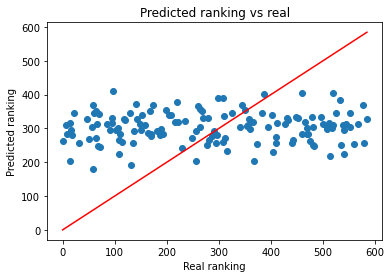